# Exploratory Data Analysis (EDA)

---

## Connect & Load Data

In [ ]:
import pandas as pd
from sqlalchemy import create_engine
from pathlib import Path
from dotenv import load_dotenv
import os

# locate .env (project root)
env_path = Path(__file__).parent / ".env"
load_dotenv(dotenv_path=env_path)

# now read it
DB_URI = os.getenv("DATABASE_URL")

engine = create_engine(DB_URI)

# Load the clean table
df = pd.read_sql("SELECT * FROM telco_clean", engine)

---

## Initial Inspection

In [2]:
# 1. Dimensions & columns
print(df.shape)
print(df.columns.tolist())

# 2. Types & non-null counts
df.info()

# 3. Descriptive stats for numeric fields
df.describe().T

(7043, 21)
['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents', 'tenure', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod', 'monthlycharges', 'totalcharges', 'churn']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   ob

,count,mean,std,min,25%,50%,75%,max
seniorcitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
monthlycharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
totalcharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


---

## Missing Values

In [3]:
null_counts = df.isna().sum().sort_values(ascending=False)
print(null_counts)

totalcharges        11
gender               0
seniorcitizen        0
partner              0
customerid           0
dependents           0
tenure               0
multiplelines        0
phoneservice         0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
internetservice      0
techsupport          0
streamingtv          0
contract             0
streamingmovies      0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
churn                0
dtype: int64


---

## Target Balance

churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


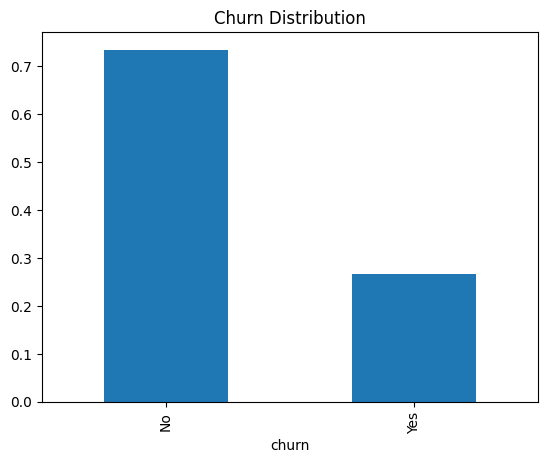

In [4]:
churn_rate = df['churn'].value_counts(normalize=True)
print(churn_rate)
churn_rate.plot(kind='bar', title='Churn Distribution');

---

## Univariate Distributions

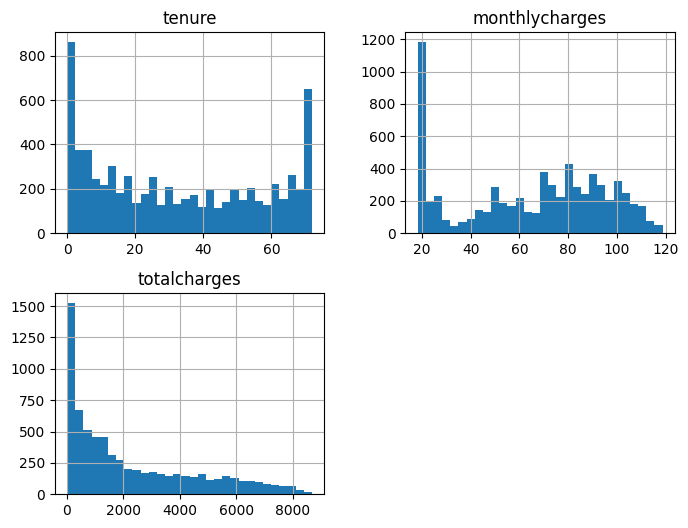

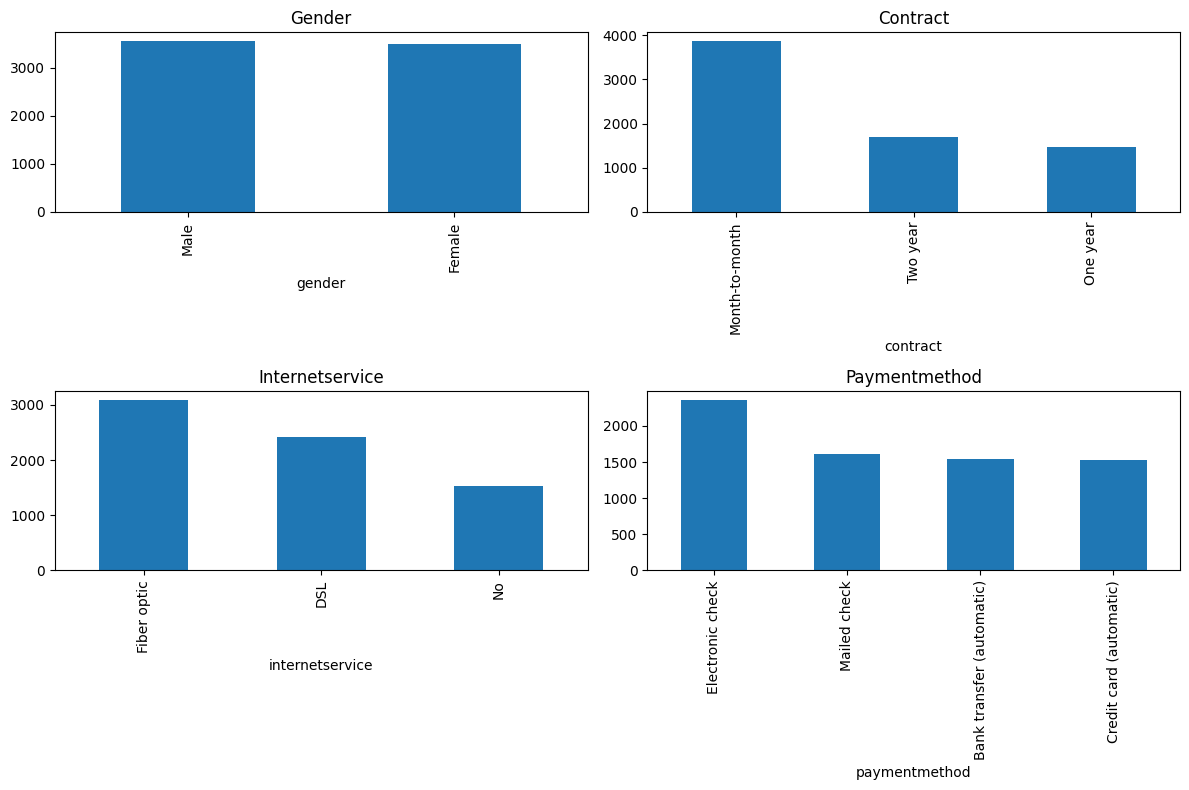

In [5]:
# Numeric features
df[['tenure','monthlycharges','totalcharges']].hist(bins=30, figsize=(8,6));

# Categorical features
import matplotlib.pyplot as plt

cat_cols = ['gender','contract','internetservice','paymentmethod']
plt.figure(figsize=(12,8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2,2,i)
    df[col].value_counts().plot(kind='bar', title=col.capitalize())
plt.tight_layout()

---

## Bivariate Analysis vs. Churn

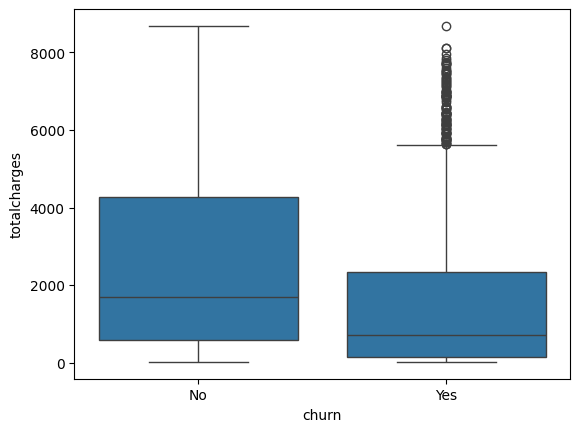

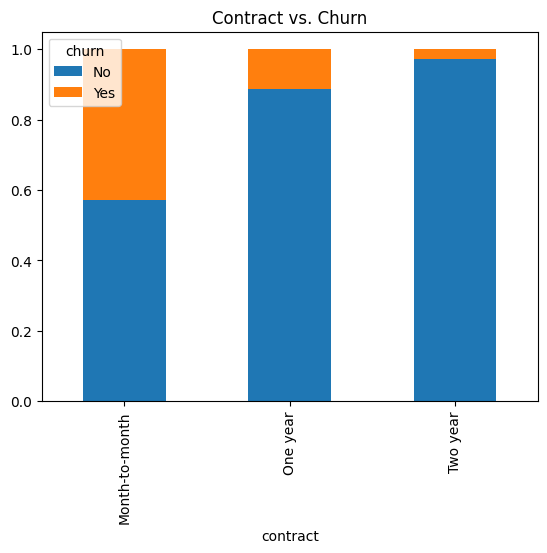

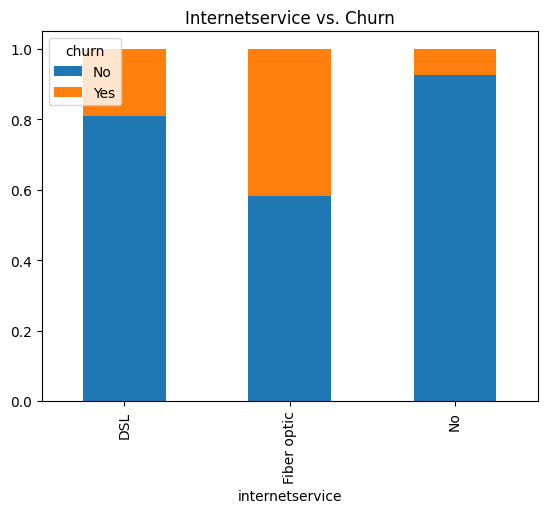

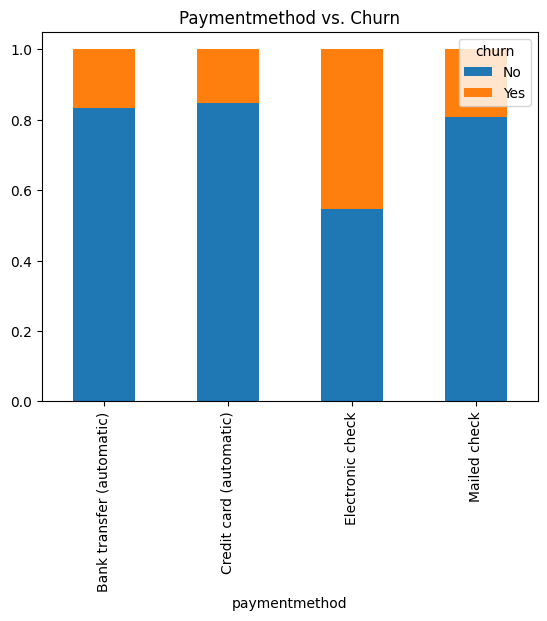

In [6]:
import seaborn as sns

# Numeric vs. churn
sns.boxplot(x='churn', y='totalcharges', data=df);

# Categorical vs. churn
for col in ['contract','internetservice','paymentmethod']:
    ct = pd.crosstab(df[col], df['churn'], normalize='index')
    ct.plot(kind='bar', stacked=True, title=f'{col.capitalize()} vs. Churn')
    plt.show()

---

## Correlation Matrix

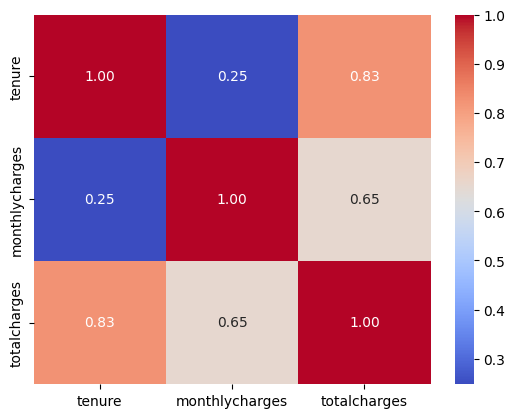

In [7]:
corr = df[['tenure','monthlycharges','totalcharges']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm");